### K-Means_Clustering

Problem Statement : Built a K-Mean Cluster Profile For the Wholesale customers data

Dataset --> Wholesale customers data.csv

In [1]:
#Loading the Required Libary
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Wholesale customers data.csv");
Dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#Checking NA Values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Inference: There are No NA Values in the Dataset

In [4]:
Dataset['Channel'].var()

0.2190722716918627

In [5]:
Dataset['Region'].var()

0.5994978256367766

Inference: The Variance of the column 'Channel' & 'Region' is very less So, droping them.

In [6]:
#Droping 'Channel' & 'Region' Column
Dataset.drop(['Channel','Region'], axis = 1, inplace = True)
Dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Inference: Insignificant Columns are Dropped, And No Need to Normalize the values, as they are in same scale.

#### Elbow Graph / scree plot
How to find optimum number of  cluster

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

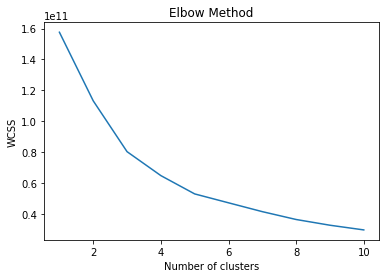

In [7]:
#wcss- within cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0) # will start at 0(randam_state)
    kmeans.fit(Dataset)
    wcss.append(kmeans.inertia_)
 
#Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Inference: the optimum value of K would be 3,5 as it can been through figure

In [8]:
#Checking the Wcss 
wcss

[157595857165.60883,
 113217528520.90987,
 80342166920.9407,
 64855545528.21104,
 53019062599.73089,
 47268536487.10492,
 41548901634.243,
 36471327478.59547,
 32765817439.526077,
 29734145058.237057]

#### Building Cluster algorithm for k = 3

In [9]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(Dataset)

KMeans(n_clusters=3, random_state=0)

In [10]:
#Fetching the cluster by its labels
clusters_new.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 7751.98113208, 17910.50943396, 27037.90566038,  1970.94339623,
        12104.86792453,  2185.73584906],
       [ 8341.61280488,  3779.89329268,  5152.17378049,  2577.23780488,
         1720.57317073,  1136.54268293],
       [36156.38983051,  6123.6440678 ,  6366.77966102,  6811.11864407,
         1050.01694915,  3090.05084746]])

#### The Cluster Profiling

In [12]:
#Assign clusters to the data set
Dataset['clusterid_new'] = clusters_new.labels_
Dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterid_new
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


In [13]:
#Profile
Dataset.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,,mean,mean,mean,mean,mean,mean
0,0,7751.981132,17910.509434,27037.905660,1970.943396,12104.867925,2185.735849
1,1,8341.612805,3779.893293,5152.173780,2577.237805,1720.573171,1136.542683
2,2,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847


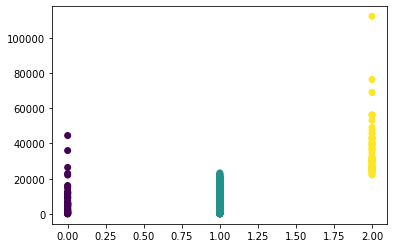

In [14]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Dataset['clusterid_new'],Dataset['Fresh'], c = clusters_new.labels_)

#### Building Cluster algorithm for k = 5

In [15]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=0)
clusters_new.fit(Dataset)

KMeans(n_clusters=5, random_state=0)

In [16]:
#Fetching the cluster by its labels
clusters_new.labels_

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 2, 2, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 0, 2, 2, 3, 3, 0, 1, 2, 3, 2, 2, 3, 3, 2, 0, 0, 1, 2, 2, 0, 0,
       3, 0, 0, 4, 3, 0, 3, 3, 1, 0, 2, 3, 0, 0, 3, 3, 3, 4, 3, 0, 3, 4,
       3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 3, 0, 3, 2, 3, 4, 4, 1,
       3, 2, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 2, 0, 0, 3, 0,
       3, 0, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 3, 1, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 2, 0, 3, 3, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 0, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 1, 3, 3, 3, 3, 0, 0, 2, 3, 3, 0, 3, 2, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 2, 4, 3, 3, 0, 0, 0, 2, 0, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2,
       2, 3, 3, 0, 3, 3, 2, 3, 3, 0, 3, 2, 3, 2, 3, 3, 1, 1, 3, 3, 2, 3,
       0, 0, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 1, 1,
       3, 2, 2, 1, 3, 3, 3, 0, 2, 3, 2, 3, 3, 3, 2,

In [17]:
#these are standardized values.
clusters_new.cluster_centers_

array([[4.99148148e+03, 1.21405432e+04, 1.85055062e+04, 1.59111111e+03,
        8.14824691e+03, 1.82240741e+03, 4.32098765e-01],
       [4.98995455e+04, 6.99500000e+03, 6.55877273e+03, 9.88718182e+03,
        9.84590909e+02, 4.68195455e+03, 2.00000000e+00],
       [2.16278558e+04, 3.90326923e+03, 5.11935577e+03, 4.19454808e+03,
        1.12304808e+03, 1.71321154e+03, 1.35576923e+00],
       [6.14387168e+03, 3.27679204e+03, 4.11516372e+03, 2.43834956e+03,
        1.22070354e+03, 9.92539823e+02, 1.00000000e+00],
       [2.00312857e+04, 3.80840000e+04, 5.61261429e+04, 2.56457143e+03,
        2.76445714e+04, 2.54814286e+03, 0.00000000e+00]])

#### The Cluster Profiling

In [18]:
#Assign clusters to the data set
Dataset['clusterid_new'] = clusters_new.labels_
Dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterid_new
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,3


In [19]:
#Profile
Dataset.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,,mean,mean,mean,mean,mean,mean
0,0,4991.481481,12140.543210,18505.506173,1591.111111,8148.246914,1822.407407
1,1,49899.545455,6995.000000,6558.772727,9887.181818,984.590909,4681.954545
2,2,21627.855769,3903.269231,5119.355769,4194.548077,1123.048077,1713.211538
3,3,6143.871681,3276.792035,4115.163717,2438.349558,1220.703540,992.539823
4,4,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857


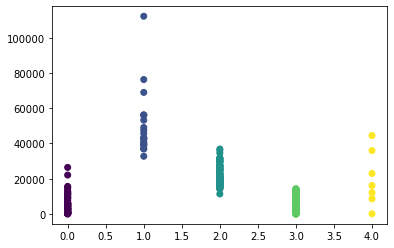

In [20]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Dataset['clusterid_new'],Dataset['Fresh'], c = clusters_new.labels_)